In [1]:
import pandas as pd
import numpy as np

In [2]:
car = pd.read_csv(r'car_price.csv')

In [3]:
car.head()

,symboling,normalized_losses,Fuel_type,make,num_of_doors,aspiration,wheel_base,engine_location,drive_wheels,body_style,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,gas,std,two,convertible,rwd,front,88.6,alfa-romero,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,gas,std,two,convertible,rwd,front,88.6,alfa-romero,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,gas,std,two,hatchback,rwd,front,94.5,alfa-romero,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,gas,std,four,sedan,fwd,front,99.8,audi,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,gas,std,four,sedan,4wd,front,99.4,audi,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [4]:
car.shape

(205, 26)

In [5]:
# WE have special characters in our data
# We will convert this special characters as top null values.
# Once we convert into nulls then we already how to handle the null.


In [6]:
car = car.replace({'?':  np.nan})

In [7]:
car.head()

,symboling,normalized_losses,Fuel_type,make,num_of_doors,aspiration,wheel_base,engine_location,drive_wheels,body_style,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,gas,std,two,convertible,rwd,front,88.6,alfa-romero,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,gas,std,two,convertible,rwd,front,88.6,alfa-romero,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,gas,std,two,hatchback,rwd,front,94.5,alfa-romero,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,gas,std,four,sedan,fwd,front,99.8,audi,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,gas,std,four,sedan,4wd,front,99.4,audi,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [8]:
car.isnull().sum()

symboling             0
normalized_losses    41
Fuel_type             0
make                  0
num_of_doors          2
aspiration            0
wheel_base            0
engine_location       0
drive_wheels          0
body_style            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

In [9]:
car.isnull().sum()[car.isnull().sum()>0]

normalized_losses    41
num_of_doors          2
bore                  4
stroke                4
horsepower            2
peak_rpm              2
price                 4
dtype: int64

In [10]:
car.normalized_losses.value_counts()

161    11
91      8
150     7
128     6
134     6
104     6
95      5
102     5
103     5
74      5
85      5
168     5
94      5
65      5
106     4
122     4
148     4
118     4
93      4
101     3
125     3
137     3
154     3
83      3
115     3
119     2
87      2
194     2
197     2
108     2
89      2
164     2
158     2
145     2
192     2
188     2
81      2
110     2
113     2
129     2
153     2
107     1
78      1
186     1
231     1
77      1
98      1
121     1
90      1
142     1
256     1
Name: normalized_losses, dtype: int64

In [11]:
car.normalized_losses = car.normalized_losses.astype('float')
car.bore = car.bore.astype('float')
car.stroke = car.stroke.astype('float')
car.horsepower = car.horsepower.astype('float')
car.peak_rpm = car.peak_rpm.astype('float')
car.price = car.price.astype('float')

In [12]:
car.normalized_losses = car.normalized_losses.fillna(car.normalized_losses.mean())

In [13]:
car.bore = car.bore.fillna(car.bore.mean())

In [14]:
car.stroke = car.stroke.fillna(car.stroke.mean())
car.horsepower = car.horsepower.fillna(car.horsepower.mean())
car.peak_rpm = car.peak_rpm.fillna(car.peak_rpm.mean())

In [15]:
car.isnull().sum()

symboling            0
normalized_losses    0
Fuel_type            0
make                 0
num_of_doors         2
aspiration           0
wheel_base           0
engine_location      0
drive_wheels         0
body_style           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                4
dtype: int64

In [16]:
car.num_of_doors.value_counts()

four    114
two      89
Name: num_of_doors, dtype: int64

In [17]:
car.num_of_doors = car.num_of_doors.fillna('four')

In [18]:
car = car.dropna()

In [19]:
car.shape

(201, 26)

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le = LabelEncoder()

In [22]:
car[car.select_dtypes(include = ['object']).columns] = car[car.select_dtypes(include = ['object']).columns].apply(le.fit_transform)

In [23]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized_losses  201 non-null    float64
 2   Fuel_type          201 non-null    int32  
 3   make               201 non-null    int32  
 4   num_of_doors       201 non-null    int32  
 5   aspiration         201 non-null    int32  
 6   wheel_base         201 non-null    int32  
 7   engine_location    201 non-null    int32  
 8   drive_wheels       201 non-null    float64
 9   body_style         201 non-null    int32  
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb_weight        201 non-null    int64  
 14  engine_type        201 non-null    int32  
 15  num_of_cylinders   201 non-null    int32  
 16  engine_size        201 non

In [24]:
car.head()

,symboling,normalized_losses,Fuel_type,make,num_of_doors,aspiration,wheel_base,engine_location,drive_wheels,body_style,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,122.0,1,0,1,0,2,0,88.6,0,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,1,0,1,0,2,0,88.6,0,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,1,0,1,2,2,0,94.5,0,...,152,5,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,1,0,0,3,1,0,99.8,1,...,109,5,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,1,0,0,3,0,0,99.4,1,...,136,5,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
car =df1

In [32]:
car_train, car_test = train_test_split(car,test_size=0.2)

In [33]:
car_train_x = car_train.iloc[:,0:-1]
car_train_y = car_train.iloc[:,-1]

In [34]:
car_train_x

,symboling,normalized_losses,Fuel_type,make,num_of_doors,aspiration,wheel_base,engine_location,drive_wheels,body_style,...,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg
87,1,125.0,1,1,0,3,1,0,96.3,11,...,2,110,6,3.170000,3.460000,7.5,116.0,5500.0,23,30
1,3,122.0,1,0,1,0,2,0,88.6,0,...,2,130,5,3.470000,2.680000,9.0,111.0,5000.0,21,27
58,3,150.0,1,0,1,2,2,0,95.3,8,...,6,80,5,3.329751,3.255423,9.4,135.0,6000.0,16,23
81,3,153.0,1,0,1,2,1,0,96.3,11,...,2,122,1,3.350000,3.460000,8.5,88.0,5000.0,25,32
146,0,89.0,1,0,0,4,1,0,97.0,18,...,2,108,1,3.620000,2.640000,9.0,82.0,4800.0,28,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,2,168.0,1,0,1,1,1,0,95.1,12,...,2,97,1,3.150000,3.290000,9.4,69.0,5200.0,31,37
51,1,104.0,1,0,1,2,1,0,93.1,8,...,2,91,1,3.030000,3.150000,9.0,68.0,5000.0,31,38
36,0,78.0,1,0,0,4,1,0,96.5,5,...,2,92,0,2.920000,3.410000,9.2,76.0,6000.0,30,34
69,0,93.0,0,1,1,1,2,0,106.7,9,...,1,183,3,3.580000,3.640000,21.5,123.0,4350.0,22,25


In [35]:
car_test_x = car_test.iloc[:,0:-1]
car_test_y = car_test.iloc[:,-1]

In [36]:
car_test_x

,symboling,normalized_losses,Fuel_type,make,num_of_doors,aspiration,wheel_base,engine_location,drive_wheels,body_style,...,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg
53,1,113.0,1,0,0,3,1,0,93.1,8,...,2,91,1,3.03,3.15,9.0,68.0,5000.0,31,38
67,-1,93.0,0,1,0,3,2,0,110.0,9,...,1,183,3,3.58,3.64,21.5,123.0,4350.0,22,25
120,1,154.0,1,0,0,2,1,0,93.7,14,...,2,90,1,2.97,3.23,9.4,68.0,5500.0,31,38
20,0,81.0,1,0,0,3,1,0,94.5,3,...,2,90,1,3.03,3.11,9.6,70.0,5400.0,38,43
52,1,104.0,1,0,1,2,1,0,93.1,8,...,2,91,1,3.03,3.15,9.0,68.0,5000.0,31,38
153,0,77.0,1,0,0,4,1,0,95.7,19,...,2,92,1,3.05,3.03,9.0,62.0,4800.0,31,37
23,1,118.0,1,1,1,2,1,0,93.7,4,...,2,98,5,3.03,3.39,7.6,102.0,5500.0,24,30
166,1,168.0,1,0,1,2,2,0,94.5,19,...,2,98,5,3.24,3.08,9.4,112.0,6600.0,26,29
125,3,186.0,1,0,1,2,2,0,94.5,15,...,2,151,5,3.94,3.11,9.5,143.0,5500.0,19,27
26,1,148.0,1,0,0,3,1,0,93.7,4,...,2,90,1,2.97,3.23,9.4,68.0,5500.0,31,38


In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
lr = LinearRegression()

In [39]:
lr.fit(car_train_x , car_train_y)

LinearRegression()

In [40]:
pred_train = lr.predict(car_train_x)
pred_test = lr.predict(car_test_x)

In [41]:
err_test = car_test_y - pred_test
err_test

53     -930.648099
67     2016.176872
120    -431.774699
20    -1170.766750
52    -1030.675880
153      49.083242
23    -3259.044637
166     641.338712
125    5465.385596
26     -650.609442
133    -508.743617
115     784.147892
119   -1653.037973
19    -1337.685281
89     -704.938032
143    -327.812884
138   -1138.428465
135    2622.336079
104   -2250.192186
159    -630.166945
82     -306.978829
134   -2355.312867
122     654.860041
136    2163.608915
139     312.029649
2     -4370.002084
86     -266.710208
114    -500.321973
29     -575.084486
163     846.920579
154    1980.166687
27    -2806.968878
178     462.960265
63    -1529.390929
40     2747.269048
189    3719.985724
65     3733.251166
105   -2173.098859
Name: price, dtype: float64

In [42]:
Rsquare = lr.score(car_train_x , car_train_y)
Rsquare

0.8528561876681511

In [43]:
N = car_train_x.shape[0]
K = car_train_x.shape[1]

In [44]:
adj_Rsquare = 1-(1-Rsquare)*(N-1)/(N-K-1)
adj_Rsquare

0.8229489087389135

In [45]:
mse = np.mean(np.square(err_test))
mse

4058600.6873452053

In [46]:
rmse = np.sqrt(mse)
rmse

2014.5969044315555

In [47]:
mape = np.mean(np.abs(err_test*100/car_test_y))
mape

13.856210793470588

In [48]:
err_train = car_train_y - pred_train
err_train

87    -2663.838264
1      1114.472625
58     1250.538581
81     1034.046404
146    -469.537412
          ...     
98     1190.562276
51    -1714.094903
36     -659.641947
69     4624.645733
108   -4464.214132
Name: price, Length: 149, dtype: float64

In [49]:
import matplotlib.pyplot as plt

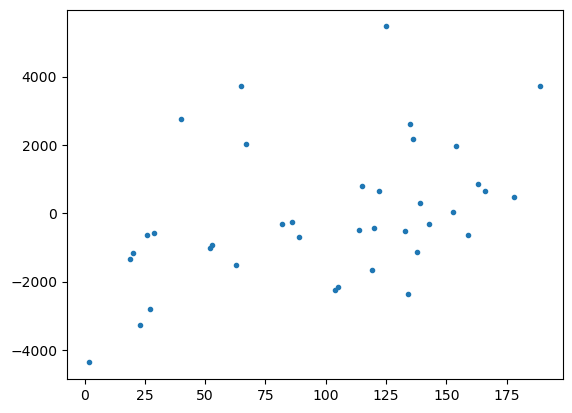

In [50]:
plt.plot(err_test, '.')

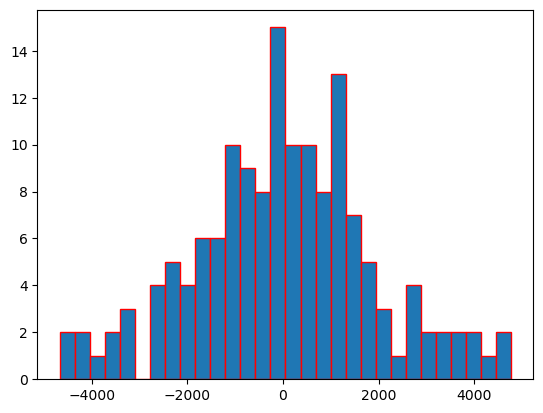

In [59]:
plt.hist(err_train, bins=30, edgecolor='r');

In [52]:
pred_actual_df = pd.DataFrame()

In [53]:
pred_actual_df['Actual'] = car_train_y
pred_actual_df['Predicted'] = pred_train

In [54]:
pred_actual_df

,Actual,Predicted
87,9279.0,11942.838264
1,16500.0,15385.527375
58,15645.0,14394.461419
81,8499.0,7464.953596
146,7463.0,7932.537412
...,...,...
98,8249.0,7058.437724
51,6095.0,7809.094903
36,7295.0,7954.641947
69,28176.0,23551.354267


In [55]:
import seaborn as sns

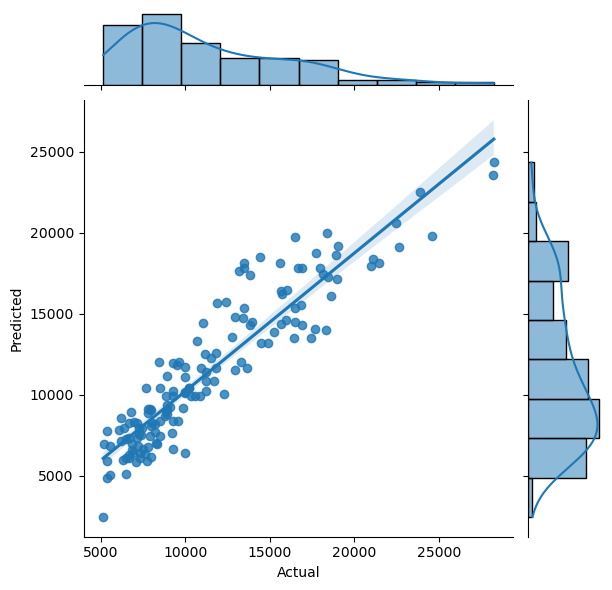

In [56]:
sns.jointplot(x='Actual', y='Predicted', data= pred_actual_df , kind='reg')

In [64]:
def remove_outlier(df,col,k):
    mean = df[col].mean()
    global df1
    sd = df[col].std()
    final_list = [x for x in df[col] if (x > mean - k * sd)] # upper limit
    final_list = [x for x in final_list if (x < mean + k *sd)] # Lower Limit
    df1 = df.loc[df[col].isin(final_list)]; print(df1.shape)
    print('Number of outliers removed ------->', df.shape[0] - df1.shape[0])

In [65]:
remove_outlier(car, 'price', 2)

(178, 26)
Number of outliers removed -------> 9
